# **<font color="aqua">--== Diabetes prediction ===--</font>**

* Autor: Alex Nina

* Fuente de los datos: [Kaggle 2023](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

## <font color="green">===== Dataset description =====</font>

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

**About Dataset**:        
- gender: It refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male, female and other.       
- age: It is an important factor as diabetes is more commonly diagnosed in older adults. ranges from 0-80 in our dataset.     
- hypertension: It is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.        
- heart_disease: It is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.  
- smoking_history: It is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.
- bmi (Body Mass Index): It is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
- HbA1c_level (Hemoglobin A1c): It is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.
- blood_glucose_level: It refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.
- diabetes: It is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

## <font color="green">===== Import libraries =====</font> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

**<font color=#4863A0>Load dataset</font>**

In [38]:
path = "../../0.dataset/diabetes_prediction_dataset.csv"
df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**<font color=#4863A0>Show information</font>**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**<font color=#4863A0>Show statistical summary</font>**

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**<font color=#4863A0></font>**

## <font color="green">===== Exploratory Data Analysis =====</font> 

In [7]:
# verificar si existe datos nulos
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

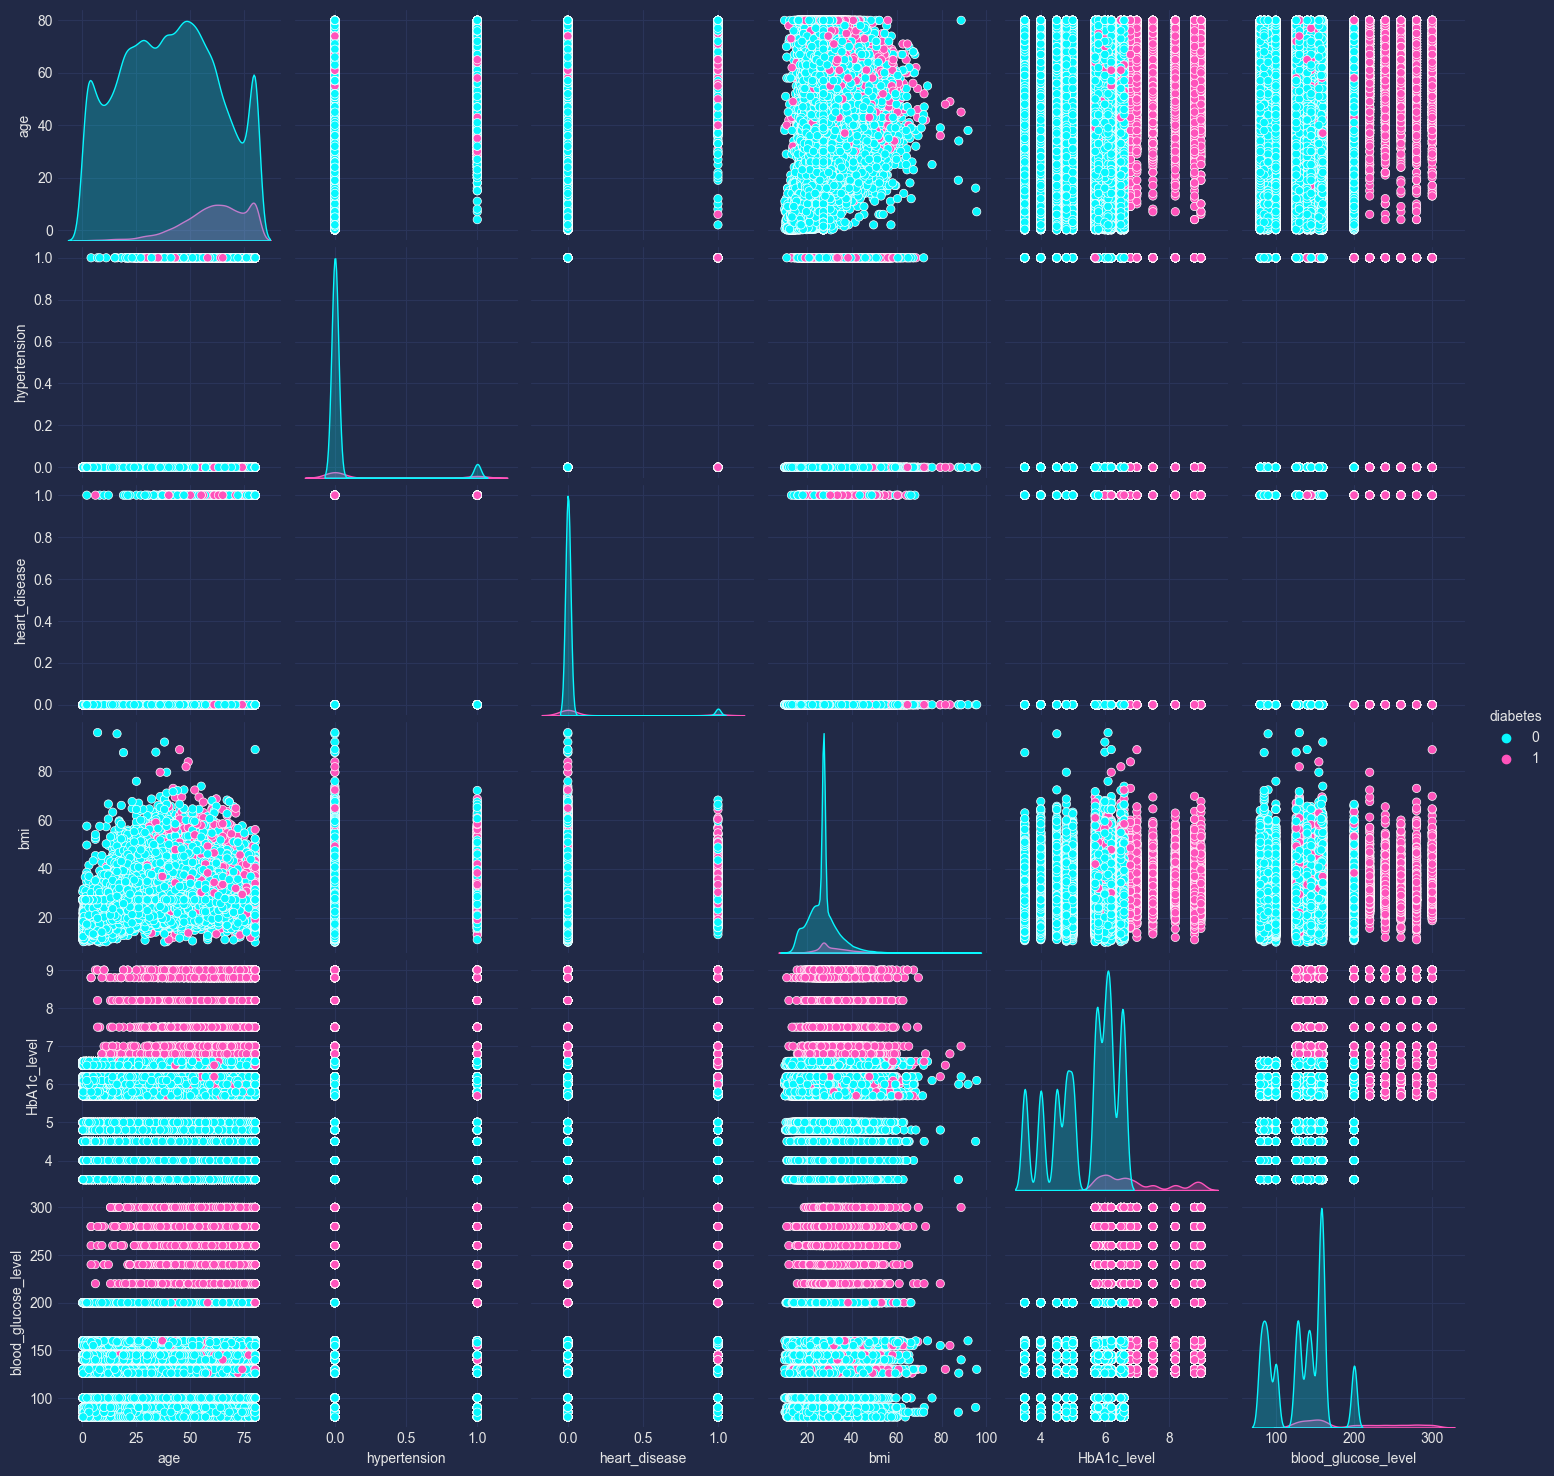

In [5]:
# matriz de scatterplots(gráficos de dispersión)
plt.style.use("cyberpunk")
nro_columns = 9
sns.pairplot(data=df[df.columns[0:nro_columns+1]],
             hue="diabetes")
plt.show()

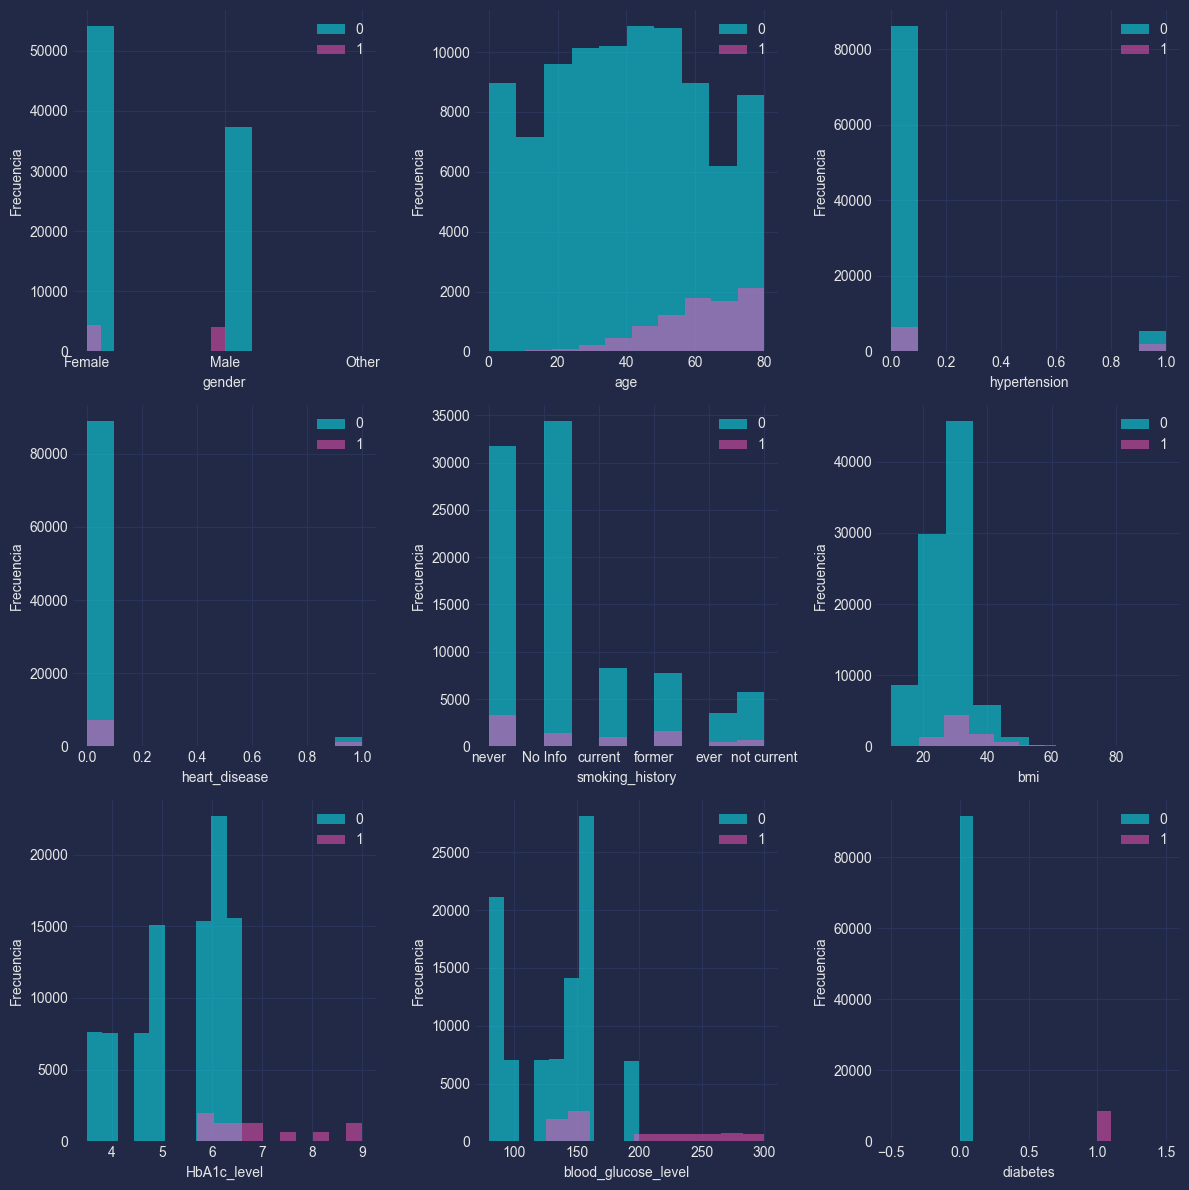

In [17]:
# TARGET VS FEATURES

# Especificar las columnas de features y el target
features = df.columns.to_list()
target = 'diabetes'

# Crear una matriz de diagramas de dispersión
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Índice para recorrer las features
index = 0

target_categories = df["diabetes"].unique()
# Crear histogramas para cada feature
for i in range(3):
    for j in range(3):
        feature = features[index]
        for category in target_categories:
            category_data = df[df[target] == category]
            axes[i][j].hist(category_data[feature], bins=10, alpha=0.5, label=category)
        axes[i][j].set_xlabel(feature)
        axes[i][j].set_ylabel('Frecuencia')
        axes[i][j].legend()
        index += 1

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

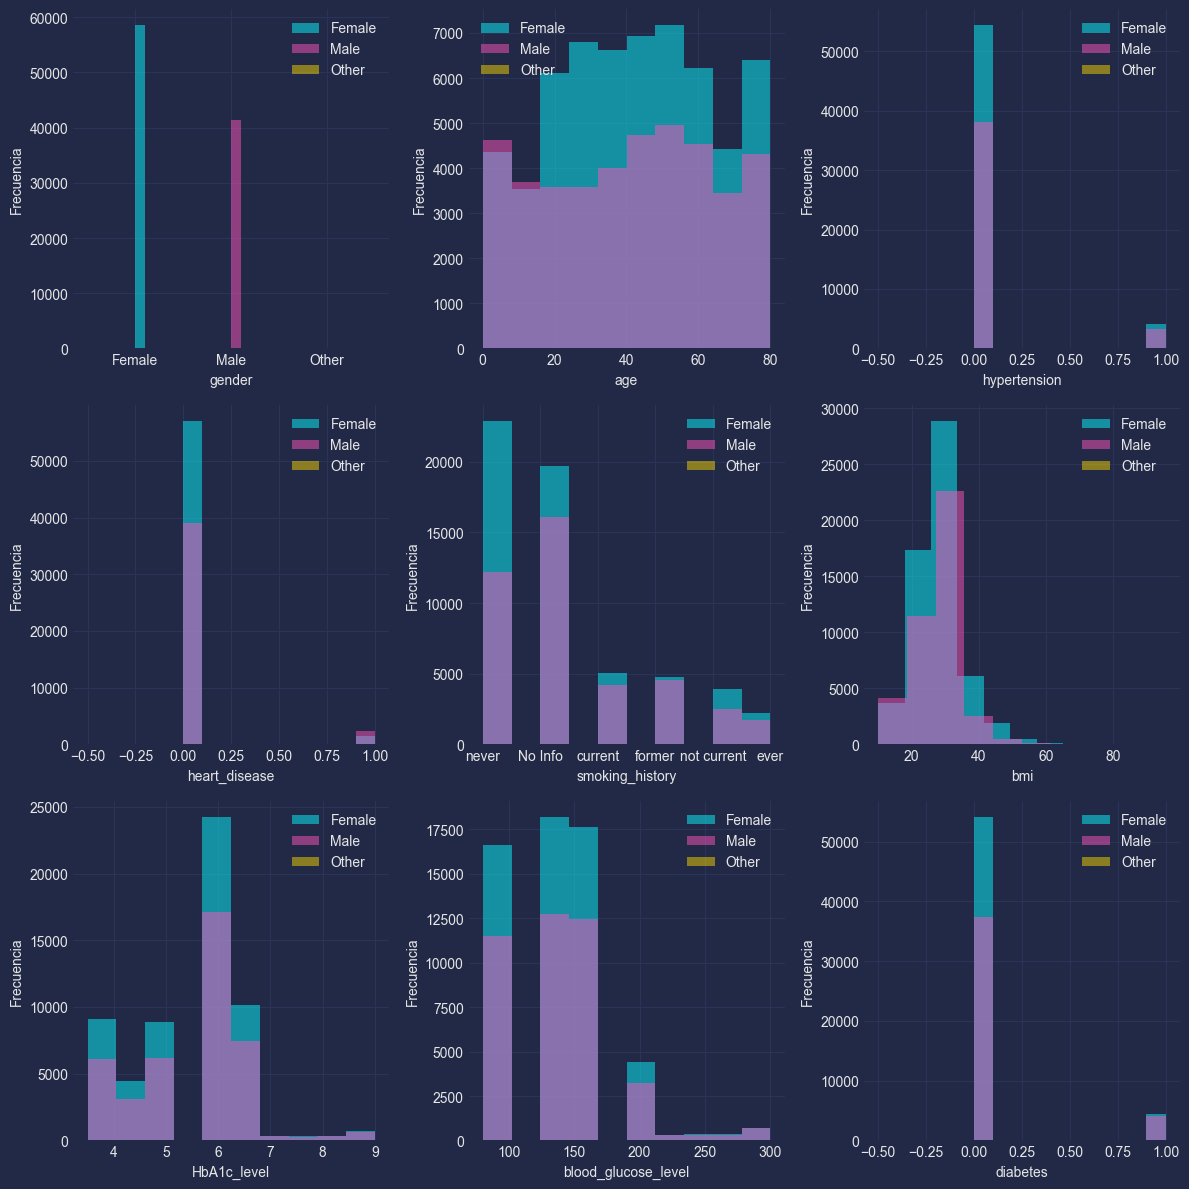

In [31]:
# GENERO VS FEATURES

# Especificar las columnas de features y el target
features = df.columns.to_list()
target = 'gender'

# Crear una matriz de diagramas de dispersión
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Índice para recorrer las features
index = 0

target_categories = df["gender"].unique()
# Crear histogramas para cada feature
for i in range(3):
    for j in range(3):
        feature = features[index]
        for category in target_categories:
            category_data = df[df[target] == category]
            axes[i][j].hist(category_data[feature], bins=10, alpha=0.5, label=category)
        axes[i][j].set_xlabel(feature)
        axes[i][j].set_ylabel('Frecuencia')
        axes[i][j].legend()
        index += 1

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

## <font color="green">===== Data Preprocessing =====</font> 

**<font color=#4863A0>Drop rows that are irrelevants</font>**

In [39]:
df["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [40]:
index_row_drop = (df[df["gender"]=="Other"]).index
df.drop(index_row_drop, axis=0, inplace=True)
df["gender"].value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

**<font color=#4863A0>Treatment of outliers</font>**

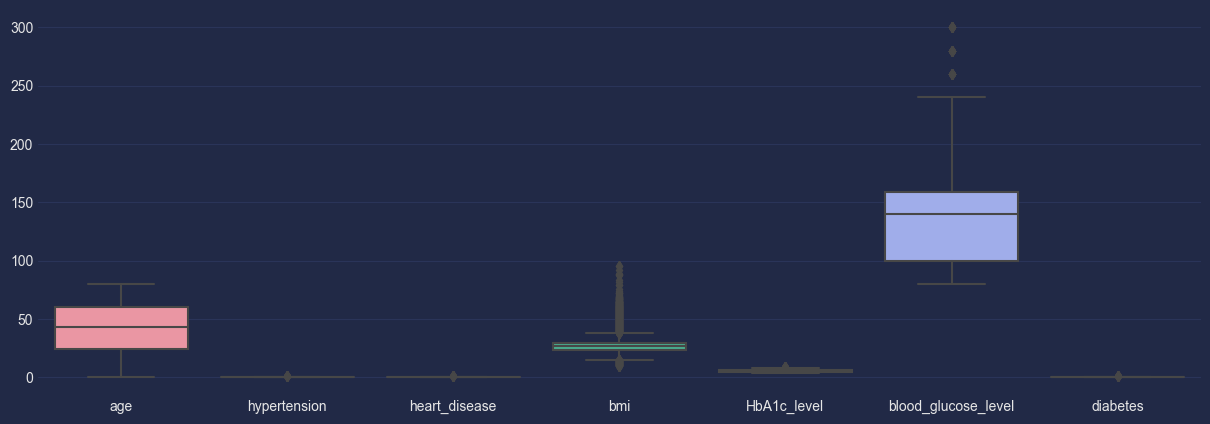

In [29]:
# boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

In [43]:
df.columns.to_list()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [44]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer
features = ["bmi","blood_glucose_level"]
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=features) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo 
windsoriser.fit(df)
# transformar en base a los datos entrenados
df = windsoriser.transform(df)

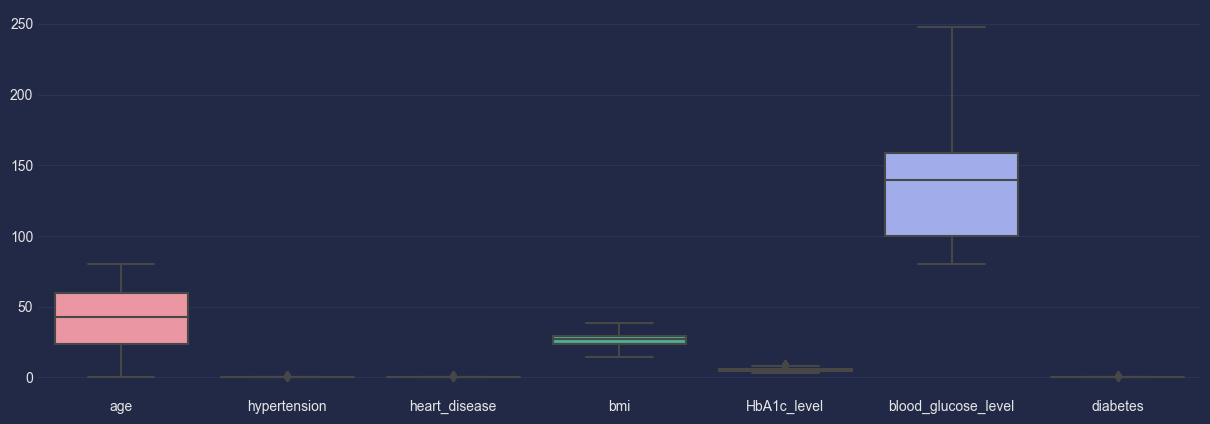

In [45]:
# show results
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

**<font color=#4863A0>Categorical to dummies</font>**

In [48]:
def convert_categorical_number(df, column_name):
    new_df = df.copy(deep=True)
    # convertir de categorico a numerico
    df_dummies = pd.get_dummies(df[f'{column_name}'], drop_first = True) 
    # Concatenamos las variables binarias al DataFrame
    new_df = pd.concat([new_df, df_dummies], axis = 1)
    # Eliminamos la vairable original race
    new_df.drop(columns=[f'{column_name}'], axis=1, inplace=True)
    return new_df

In [168]:
# convertir de categorico a numerico
new_df = convert_categorical_number(df,"gender")
new_df = convert_categorical_number(new_df,"smoking_history")
# renombrar columna
#new_df.rename(columns = {'Male': 'Gender_Male'}, inplace=True)
new_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140.0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80.0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158.0,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155.0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155.0,0,1,1,0,0,0,0


In [52]:
new_df.shape

(99982, 13)

**<font color=#4863A0>Correlation matrix</font>**

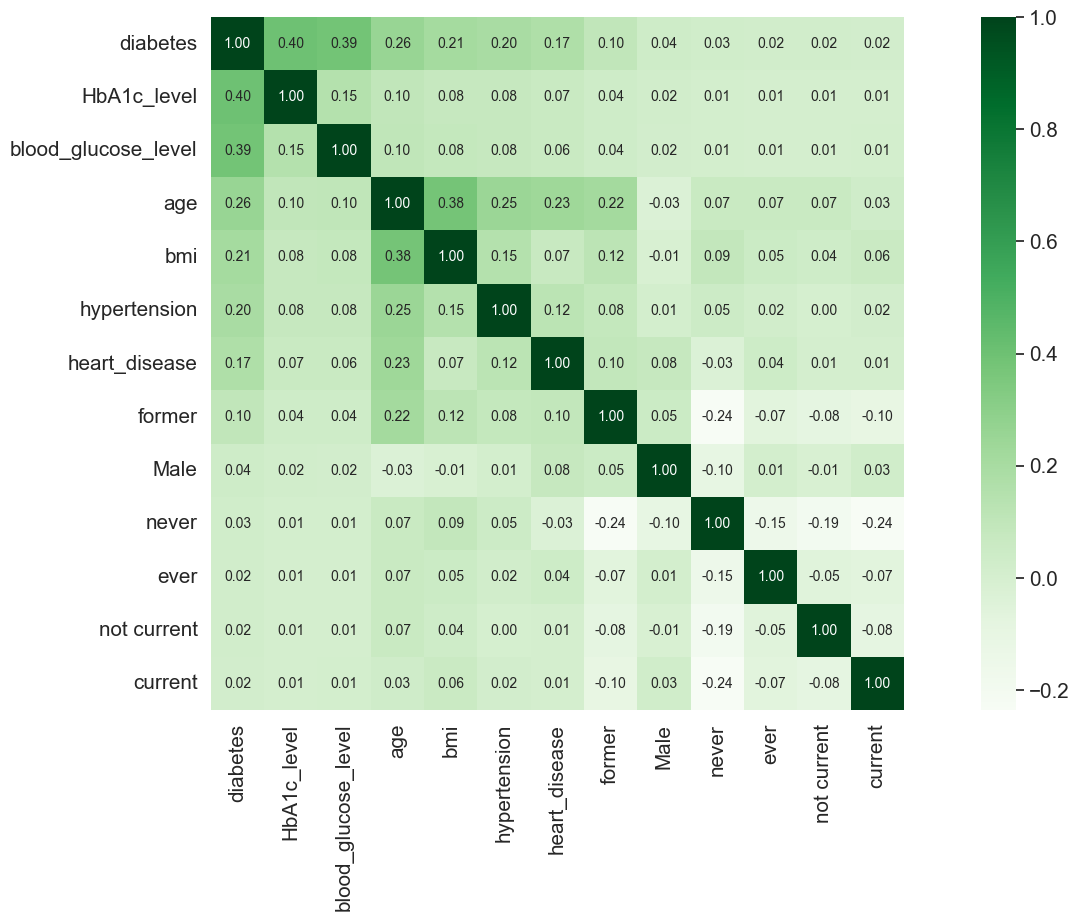

In [59]:
# OBSERVAR EL GRADO DE CORRELACION ENTRE LAS VARIABLES
target = "diabetes"
len_columns = 13

corr = new_df.corr()
columnas = corr.nlargest(len_columns , target)[target].index

plt.figure(figsize=(20, 9))
plt.style.use("cyberpunk")
cm = np.corrcoef(new_df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
#mplcyberpunk.add_glow_effects()
plt.show()

In [169]:
# Reset index
new_df.reset_index(drop=True, inplace=True)
new_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140.0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80.0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158.0,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155.0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99977,80.0,0,0,27.32,6.2,90.0,0,0,0,0,0,0,0
99978,2.0,0,0,17.37,6.5,100.0,0,0,0,0,0,0,0
99979,66.0,0,0,27.83,5.7,155.0,0,1,0,0,1,0,0
99980,24.0,0,0,35.42,4.0,100.0,0,0,0,0,0,1,0


In [149]:
new_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Male', 'current', 'ever', 'former',
       'never', 'not current'],
      dtype='object')

In [170]:
# separar data y variale objetivo
X = new_df.drop("diabetes", axis=1)
y = new_df["diabetes"]

**<font color=#4863A0>Normalization</font>**

In [182]:
# Escalado o normalizacion de los datos

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_x.fit(X)

# =========== TRANSFORMANDO =========== 
X = scaler_x.transform(X)

**<font color=#4863A0>Training and testing data</font>**

In [183]:
# =========== SEPARACION DE DATOS =========== 
from sklearn.model_selection import train_test_split

# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## <font color="green">===== Modelling =====</font> 

In [184]:
# =========== MODELADO =========== 
from sklearn.ensemble import RandomForestClassifier
# crear el modelo
model_classifier = RandomForestClassifier(max_depth=12,random_state=0)
# entrenar el modelo
model_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=0)

In [185]:
# ============= PREDECIR =============
y_pred = model_classifier.predict(X_test)

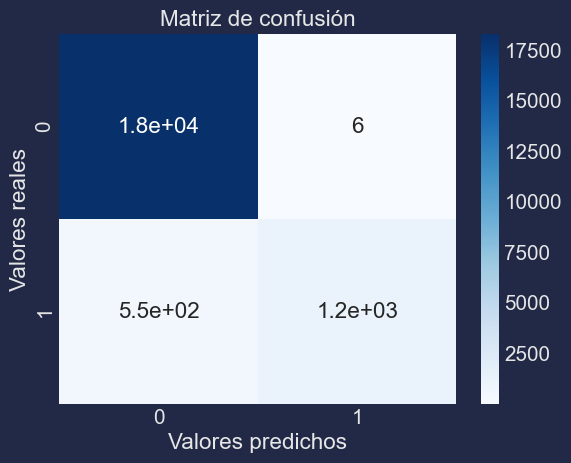

In [186]:
# ============== MATRIZ DE CONFUSION =================================
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor con Seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Ajustar las etiquetas del eje x y el título
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.title("Matriz de confusión")

# Mostrar el gráfico
plt.show()


In [187]:
# =========== METRICAS DE EVALUACION ========= 
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18289
           1       0.99      0.68      0.80      1708

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



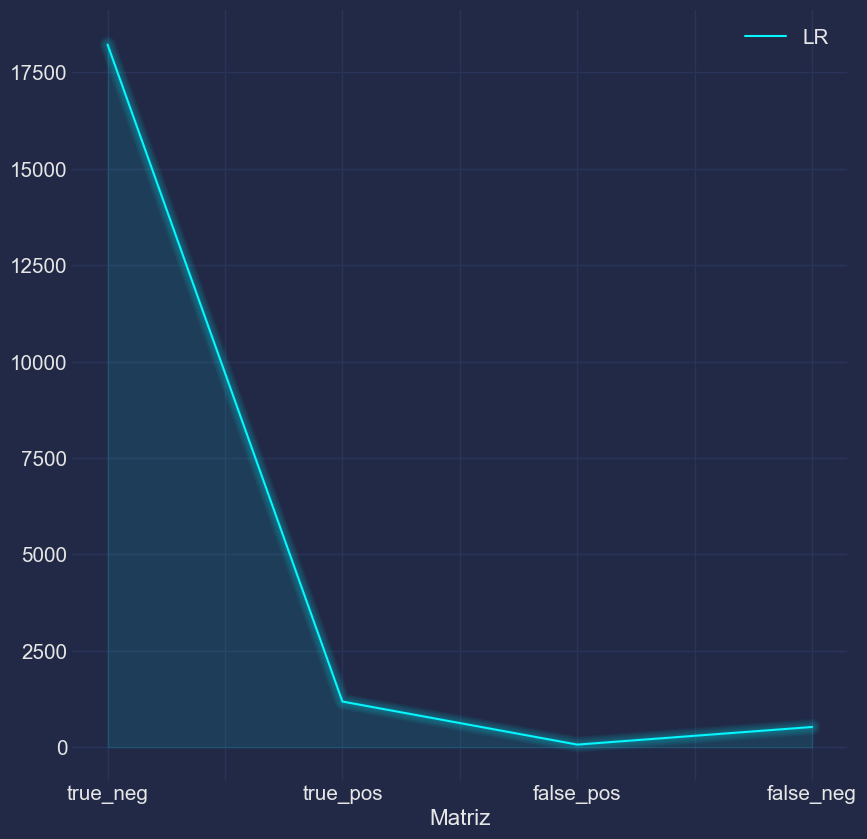

In [98]:
# ================== VISUALIZACION =================================
columns = ["true_neg","true_pos","false_pos","false_neg"]
diccionario={"Matriz":columns}
# agregar elementos al dic
values_pred = [cm[0][0], cm[1][1],cm[0][1], cm[1][0]]
diccionario[f"LR"]=values_pred

# graficar
df_values = pd.DataFrame(diccionario)

fig, ax = plt.subplots(1, figsize=(10,10))
plt.style.use("cyberpunk")
df_values.plot(x = 'Matriz', y = 'LR', ax = ax)

mplcyberpunk.add_glow_effects()
plt.show()

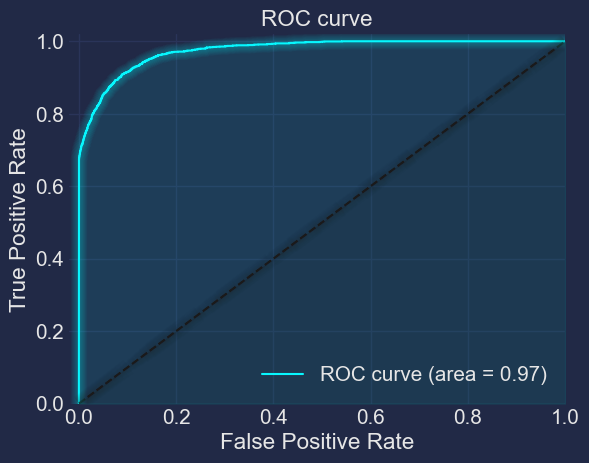

In [188]:
# ========= CURVA ROC =================
from sklearn.metrics import roc_curve, auc

# Calcular la probabilidad de predicción para cada clase
y_pred_prob = model_classifier.predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.style.use("cyberpunk")
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

mplcyberpunk.add_glow_effects()
plt.show()


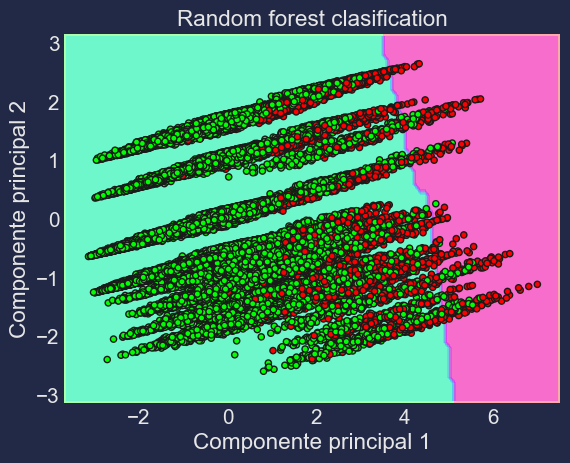

In [189]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reducir dimensionalidad de los datos utilizando PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Definir límites del gráfico
x_min, x_max = X_reduced[:, 0].min() - 0.5, X_reduced[:, 0].max() + 0.5
y_min, y_max = X_reduced[:, 1].min() - 0.5, X_reduced[:, 1].max() + 0.5

# Create color maps
cmap_light = ListedColormap([ '#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap([ '#00FF00', '#FF0000'])

# Generar malla de puntos para graficar áreas de decisión
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.style.use("cyberpunk")

# Graficar datos y áreas de decisión
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, edgecolor='k',cmap=cmap_bold)
plt.title('Random forest clasification')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [102]:
new_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140.0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80.0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158.0,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155.0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155.0,0,1,1,0,0,0,0


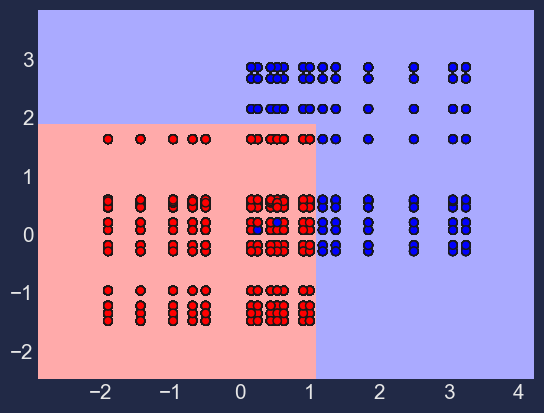

In [107]:
# import some data to play with
X = X_train[:,[4,5]]  # we only take the first two features.
y = y_train
 
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = RandomForestClassifier()
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.style.use("cyberpunk")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

mplcyberpunk.add_glow_effects()
plt.show()

In [110]:
# =========== METRICAS DE EVALUACION ========= 

# Calcular la matriz de confusión
y_pred = clf.predict(X_test[:,:2])

cm = confusion_matrix(y_test, y_pred)
cm

array([[15097,  3192],
       [  789,   919]], dtype=int64)

In [111]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88     18289
           1       0.22      0.54      0.32      1708

    accuracy                           0.80     19997
   macro avg       0.59      0.68      0.60     19997
weighted avg       0.89      0.80      0.84     19997



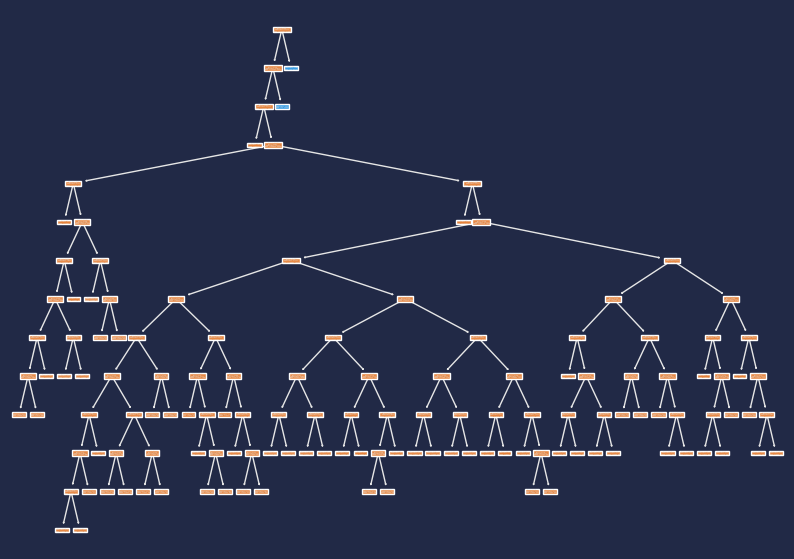

In [112]:
from sklearn.tree import plot_tree
# Obtener los árboles individuales del Random Forest
estimators = clf.estimators_

# # Graficar los árboles individuales
# for i in range(len(estimators)):
#     plt.figure(figsize=(10, 7))
#     plot_tree(estimators[i], filled=True)
#     plt.show()

plt.figure(figsize=(10, 7))
plot_tree(estimators[0], filled=True)
plt.show()

## <font color="green">===== GUARDAR MODELO ENTRENADO =====</font> 

In [195]:
import joblib
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [208]:
# Crear las etapas del pipeline
scaler_data = StandardScaler()
feature_selector = SelectKBest(k=7)
classifier = RandomForestClassifier(max_depth=12,random_state=0)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', scaler_data),  # Primer paso: escalado de características
    ('feature_selector', feature_selector),  # Segundo paso: selección de características
    ('classifier', classifier)  # Tercer paso: clasificador
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Guardar el modelo (incluyendo el pipeline) en un archivo
joblib.dump(pipeline, 'modelo_entrenado.pkl')

# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('modelo_entrenado.pkl')

In [212]:
# =========== SEPARACION DE DATOS =========== 
X = new_df.drop("diabetes",axis=1)
y = new_df["diabetes"]
# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [213]:
y_pred = modelo_cargado.predict(X_test)

In [214]:
# =========== METRICAS DE EVALUACION ========= 
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18289
           1       0.99      0.68      0.80      1708

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997

